In [1]:
! pip install plotnine pandas mizani

# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



# Articles:
# https://www.kaggle.com/code/residentmario/grammar-of-graphics-with-plotnine-optional?scriptVersionId=4327772
# https://pythonplot.com/


# https://realpython.com/ggplot-python/
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

economics

(
        ggplot(economics)  # What data to use
        + aes(x="date", y="pop")  # What variable to use
        + geom_line()  # Geometric object to use for drawing
)

In [1]:
import pandas as pd

from data import csv_data_add_histogram, csv_data_search_histogram

#csv_data

# Calculate additional columns:
csv_data_add_histogram['Rate'] = 1.0 * 1_000_000_000 / csv_data_add_histogram['Start Duration Inclusive']

# Split the class into parts:
# https://practicaldatascience.co.uk/data-science/how-to-split-strings-using-the-pandas-split-function#:~:text=The%20split()%20function%20has,times%20to%20split%20the%20string.
csv_data_add_histogram[['Class Info', 'Algorithm Test']] = csv_data_add_histogram['Class'].str.split(pat='$', expand=True)
csv_data_add_histogram['Algorithm'] = csv_data_add_histogram['Algorithm Test'].str.replace('Tests', '')

# Remove warmup data:
csv_data_add_histogram = csv_data_add_histogram[csv_data_add_histogram['Scenario'] != 'Warmup']


csv_data_add_histogram


,Class,Test,Display,Timestamp,Scenario,Item Count,Range,Queries,Start Duration Inclusive,End Duration Exclusive,Count,file,Rate,Class Info,Algorithm Test,Algorithm
76,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:01:06.5462956,Tiny Some,1000,1000000.0,10000,1.000000e+02,1.023293e+02,243,2023-12-28-20-01-06_index_Random_Gaussian.add....,1.000000e+07,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
77,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:01:06.5462956,Tiny Some,1000,1000000.0,10000,1.995262e+02,2.041738e+02,506,2023-12-28-20-01-06_index_Random_Gaussian.add....,5.011872e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
78,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:01:06.5462956,Tiny Some,1000,1000000.0,10000,3.019952e+02,3.090295e+02,120,2023-12-28-20-01-06_index_Random_Gaussian.add....,3.311311e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
79,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:01:06.5462956,Tiny Some,1000,1000000.0,10000,3.981072e+02,4.073803e+02,61,2023-12-28-20-01-06_index_Random_Gaussian.add....,2.511886e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
80,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:01:06.5462956,Tiny Some,1000,1000000.0,10000,5.011872e+02,5.128614e+02,17,2023-12-28-20-01-06_index_Random_Gaussian.add....,1.995262e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10977,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-28T20:01:06.5462956,Huge Some,10000000,1000000.0,10000,9.120108e+07,9.332543e+07,1,2023-12-28-20-01-06_index_Random_Linear.add.hi...,1.096478e+01,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
10978,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-28T20:01:06.5462956,Huge Some,10000000,1000000.0,10000,9.332543e+07,9.549926e+07,1,2023-12-28-20-01-06_index_Random_Linear.add.hi...,1.071519e+01,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
10979,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-28T20:01:06.5462956,Huge Some,10000000,1000000.0,10000,9.549926e+07,9.772372e+07,1,2023-12-28-20-01-06_index_Random_Linear.add.hi...,1.047129e+01,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
10980,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-28T20:01:06.5462956,Huge Some,10000000,1000000.0,10000,1.023293e+08,1.047129e+08,1,2023-12-28-20-01-06_index_Random_Linear.add.hi...,9.772372e+00,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo


In [3]:

# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap

scenarios = csv_data_add_histogram['Scenario'].unique()

plot_data = csv_data_add_histogram.copy()

plot_data['scenario'] = pd.Categorical(plot_data['Scenario'], categories = scenarios)
plot_data.head()




,Class,Test,Display,Timestamp,Scenario,Item Count,Range,Queries,Start Duration Inclusive,End Duration Exclusive,Count,file,Rate,Class Info,Algorithm Test,Algorithm,scenario
76,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:01:06.5462956,Tiny Some,1000,1000000.0,10000,100.000000,102.329299,243,2023-12-28-20-01-06_index_Random_Gaussian.add....,1.000000e+07,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo,Tiny Some
77,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:01:06.5462956,Tiny Some,1000,1000000.0,10000,199.526231,204.173794,506,2023-12-28-20-01-06_index_Random_Gaussian.add....,5.011872e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo,Tiny Some
78,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:01:06.5462956,Tiny Some,1000,1000000.0,10000,301.995172,309.029543,120,2023-12-28-20-01-06_index_Random_Gaussian.add....,3.311311e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo,Tiny Some
79,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:01:06.5462956,Tiny Some,1000,1000000.0,10000,398.107171,407.380278,61,2023-12-28-20-01-06_index_Random_Gaussian.add....,2.511886e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo,Tiny Some
80,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:01:06.5462956,Tiny Some,1000,1000000.0,10000,501.187234,512.861384,17,2023-12-28-20-01-06_index_Random_Gaussian.add....,1.995262e+06,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo,Tiny Some


C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


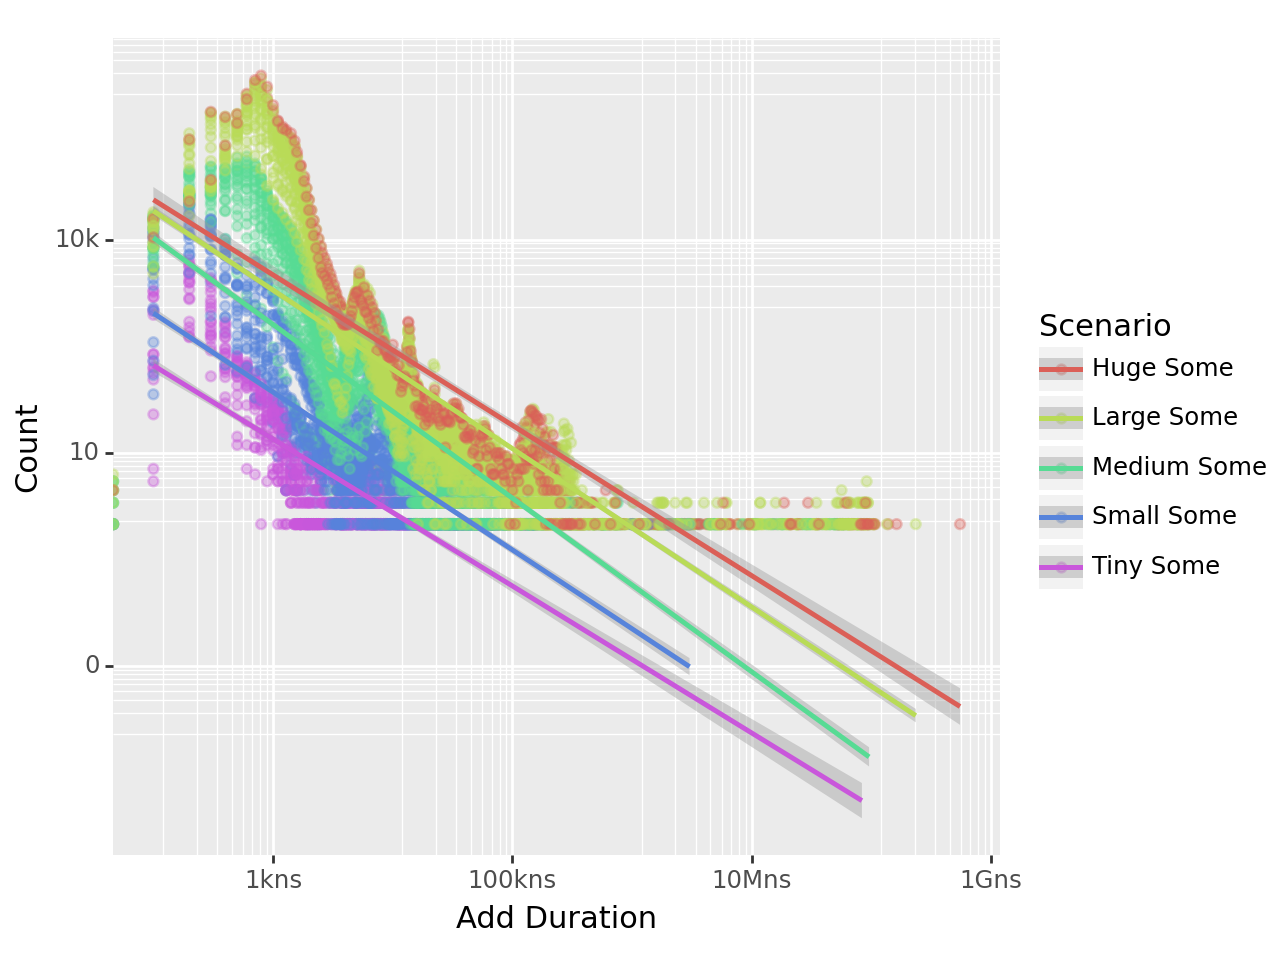

<Figure Size: (640 x 480)>

In [8]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, ggplot, \
    aes, geom_point

(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Scenario"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="ns"))
 #+ scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Add Duration', y='Count')
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


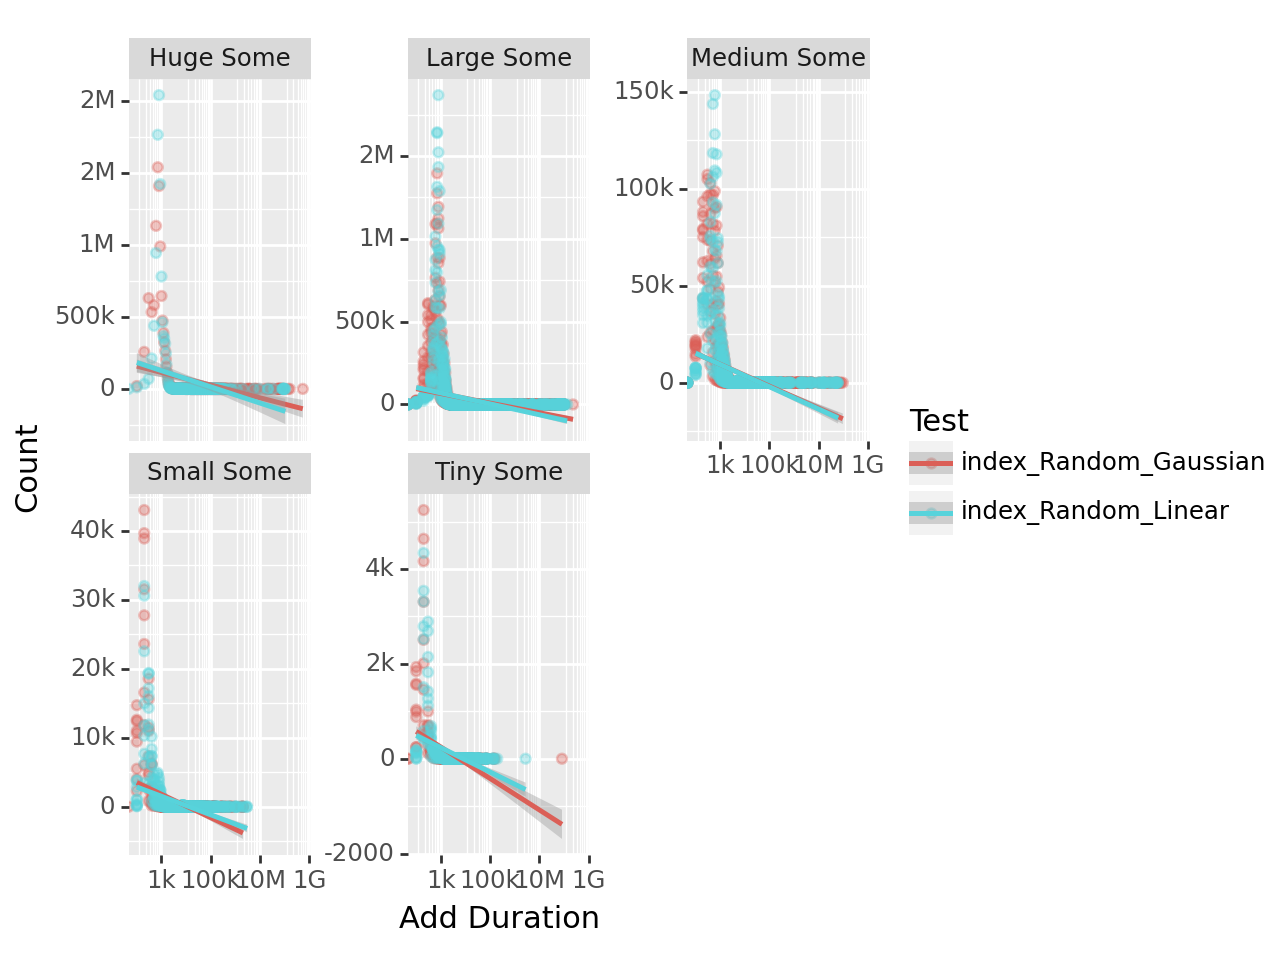

<Figure Size: (640 x 480)>

In [9]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import ggplot, scale_x_log10, geom_smooth, labs, scale_y_continuous, facet_wrap

(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + facet_wrap("Scenario", scales="free_y")
 + labs(x='Add Duration', y='Count')
 )

2k


C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


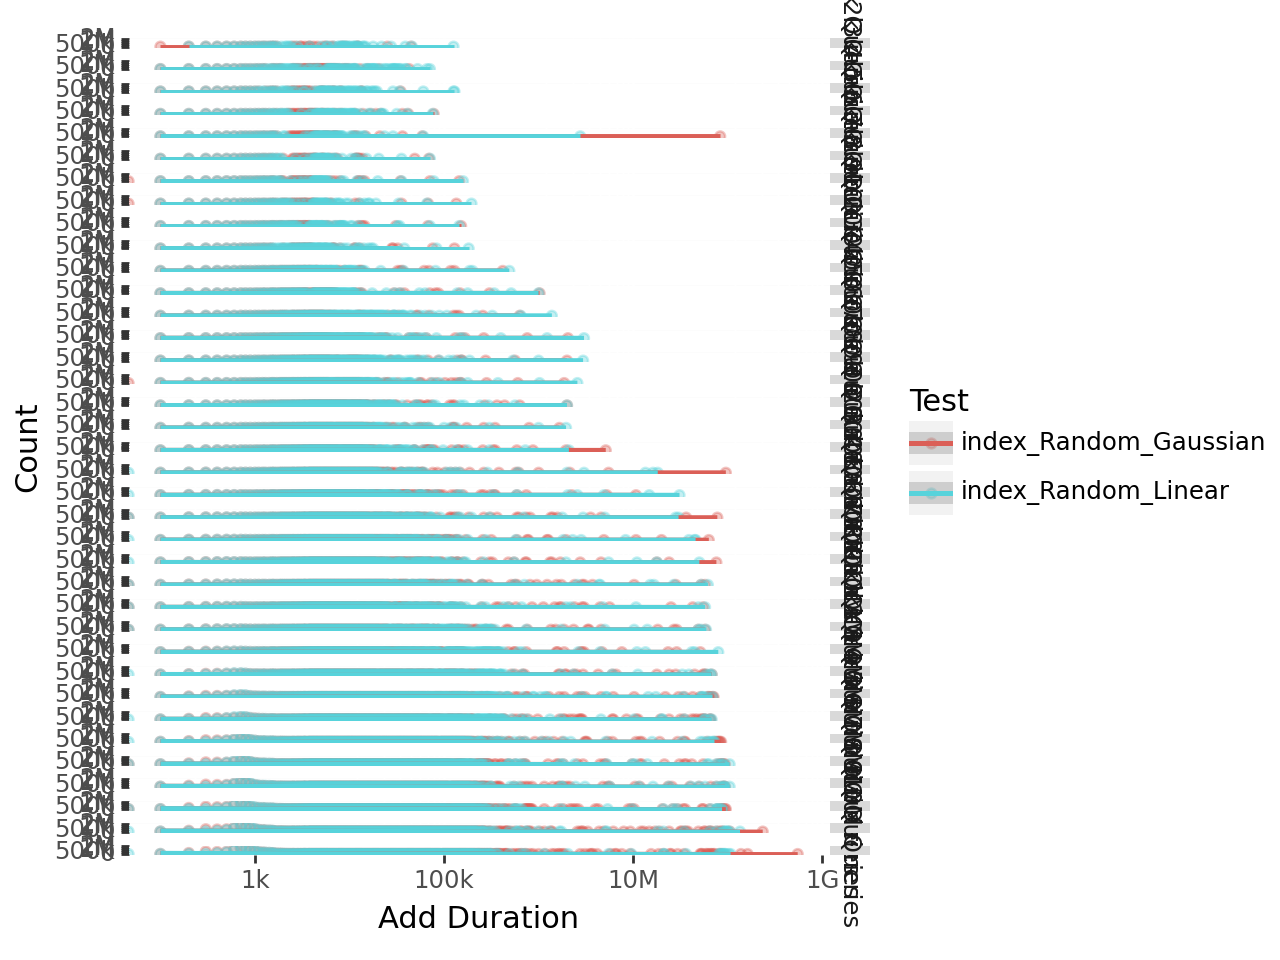

<Figure Size: (640 x 480)>

In [17]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, geom_smooth, labs, scale_y_continuous, \
    facet_grid

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


pretty_Format = number_suffix_format(fmt="{:.0f}")

print (pretty_Format([2134])[0])

def pretty_labeller(x):
    return pretty_Format([int(x)])[0] + " Queries"

(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Add Duration', y='Count')
 + facet_grid("Item Count ~ .", labeller=pretty_labeller)
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


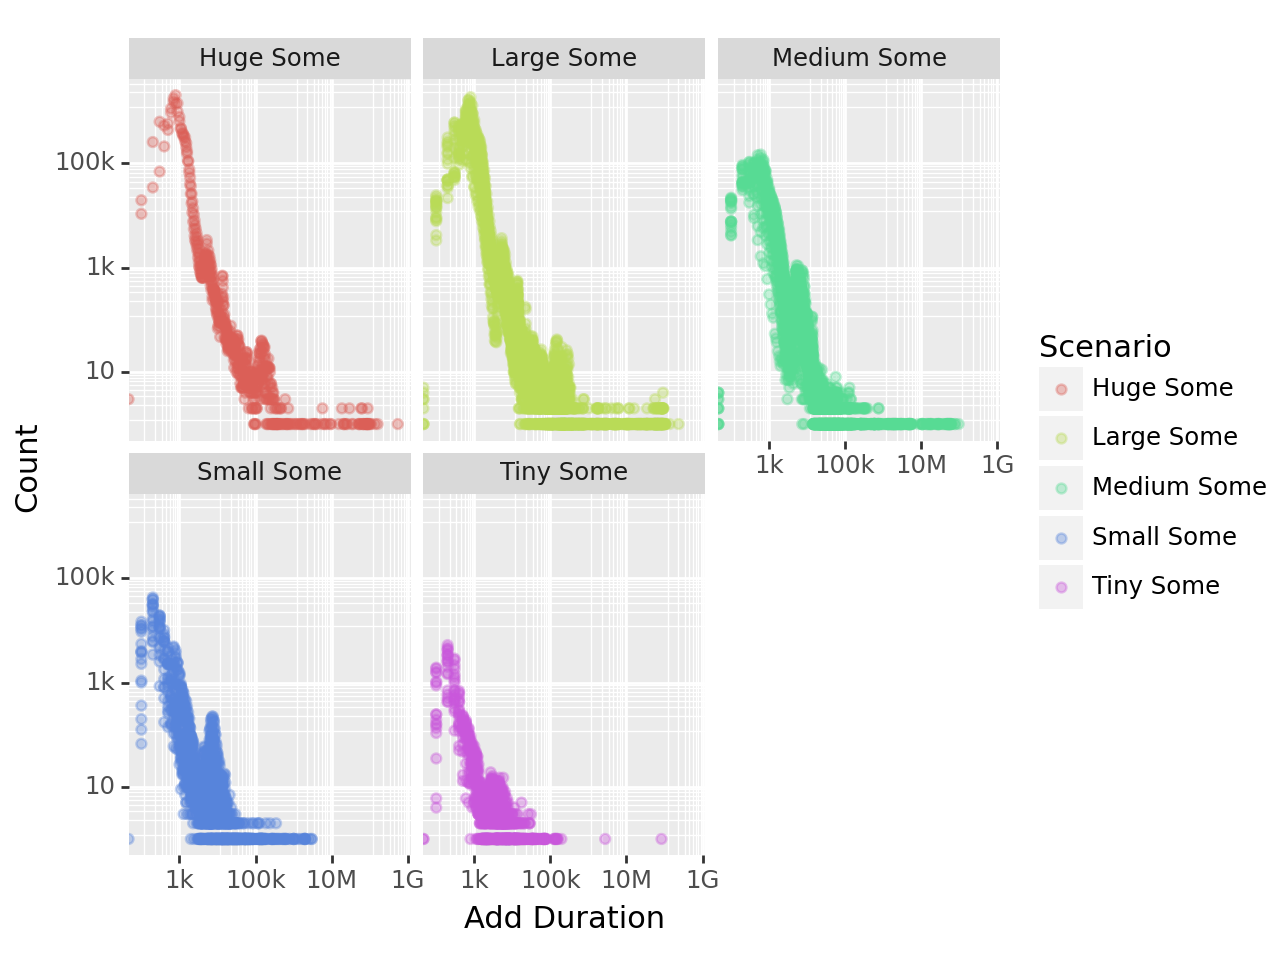

<Figure Size: (640 x 480)>

In [26]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_point, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Scenario"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 + facet_wrap("Scenario")
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


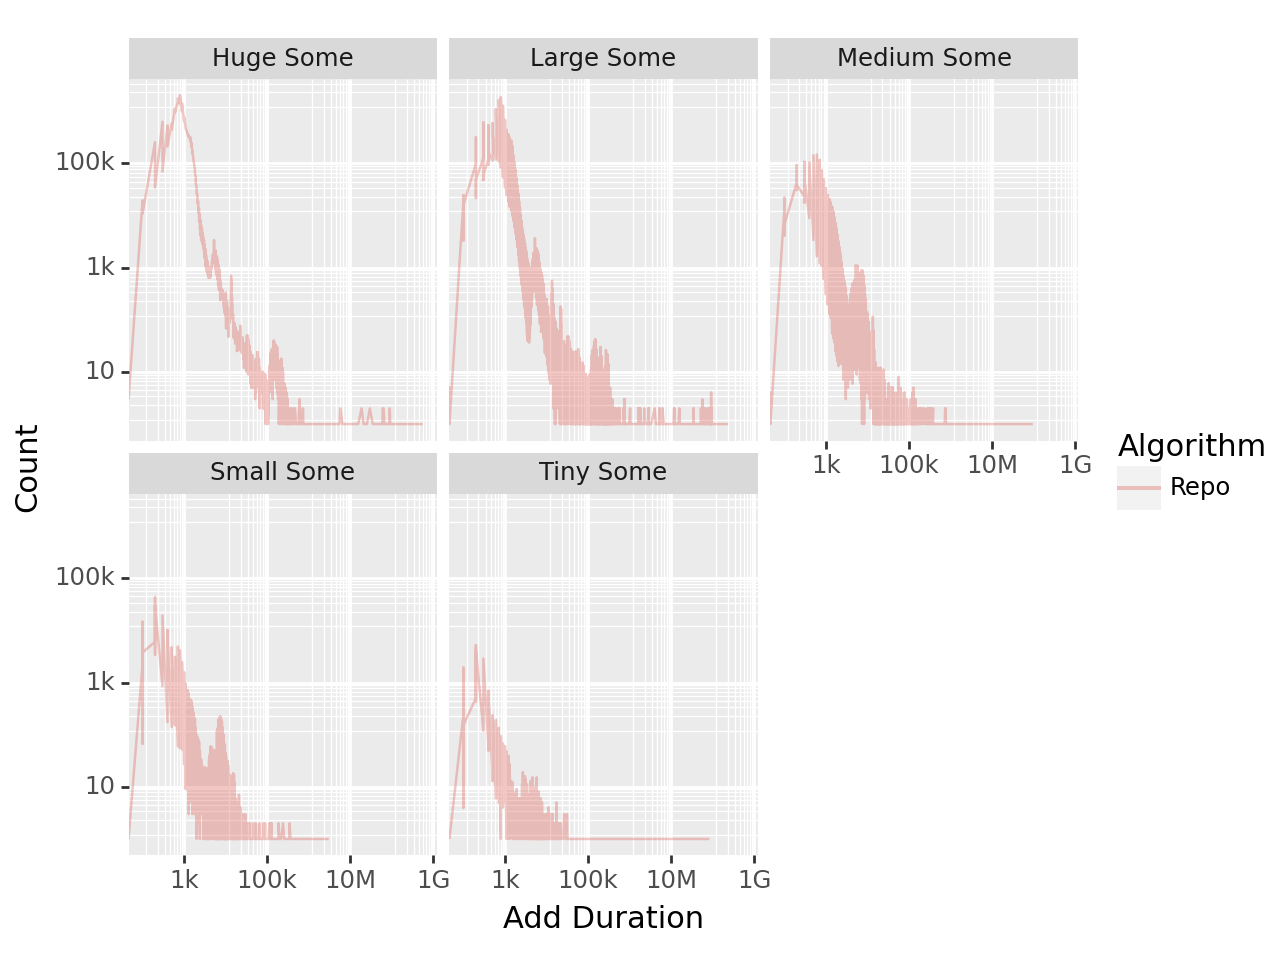

<Figure Size: (640 x 480)>

In [31]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_line, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Algorithm"))
 + geom_line(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 + facet_wrap("Scenario")
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for

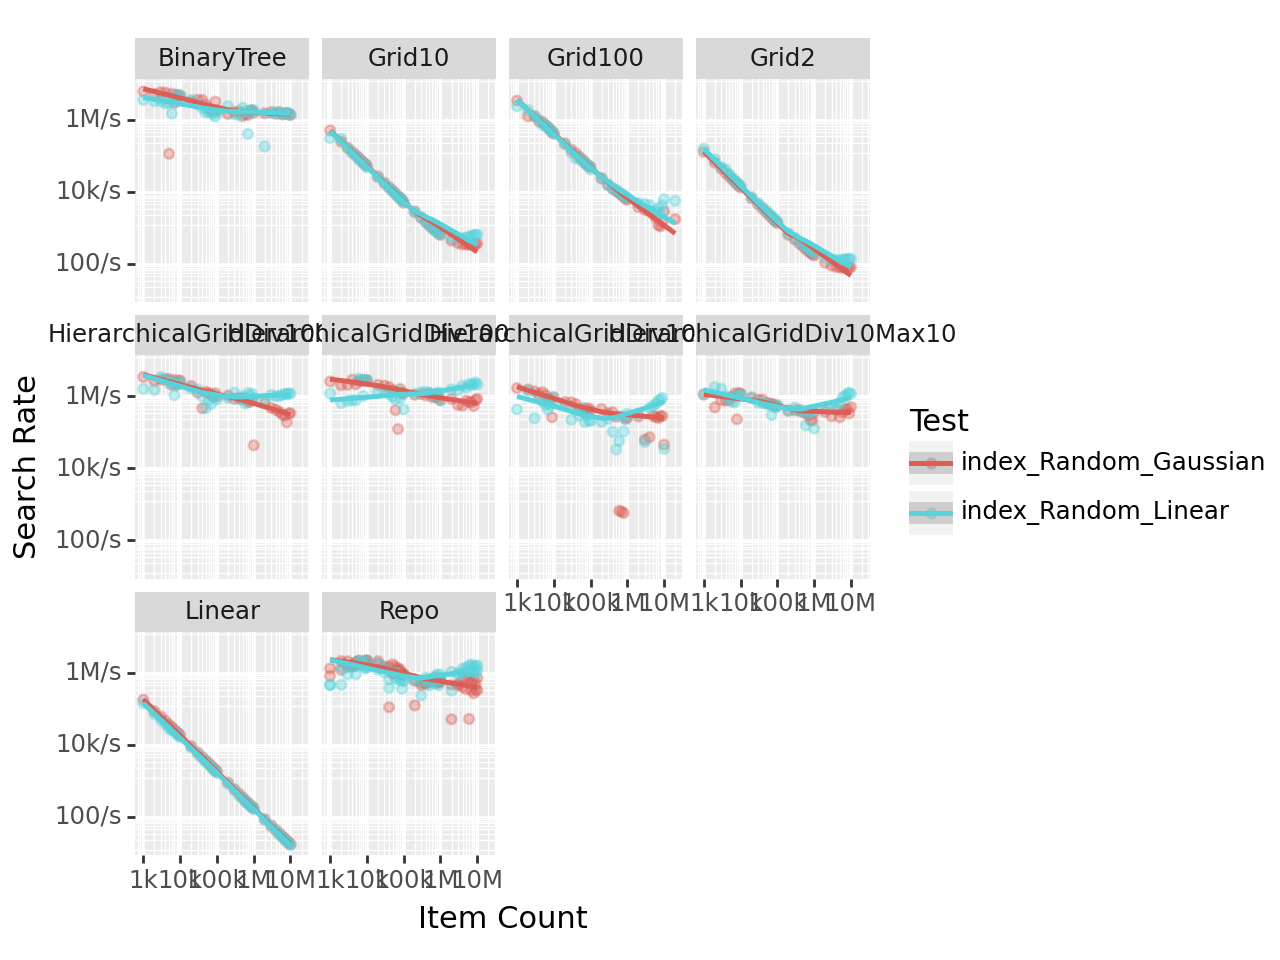

<Figure Size: (640 x 480)>

In [8]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Search Rate')
 #+ facet_wrap("Algorithm", scales="free_y")
 + facet_wrap("Algorithm", scales="fixed")
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for

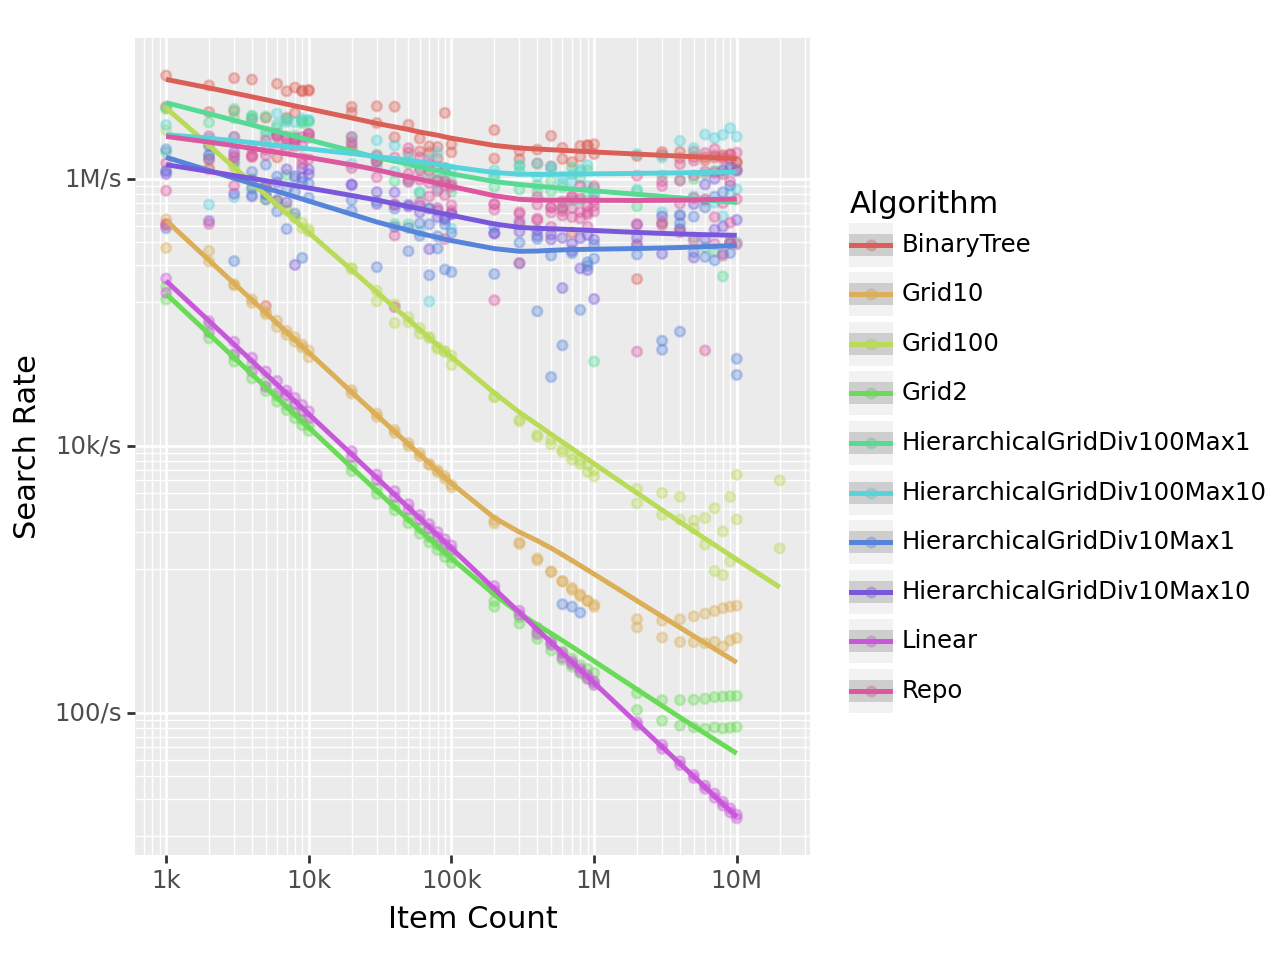

<Figure Size: (640 x 480)>

In [9]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Algorithm"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Search Rate')
 #+ facet_wrap("Test", scales="fixed")
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for

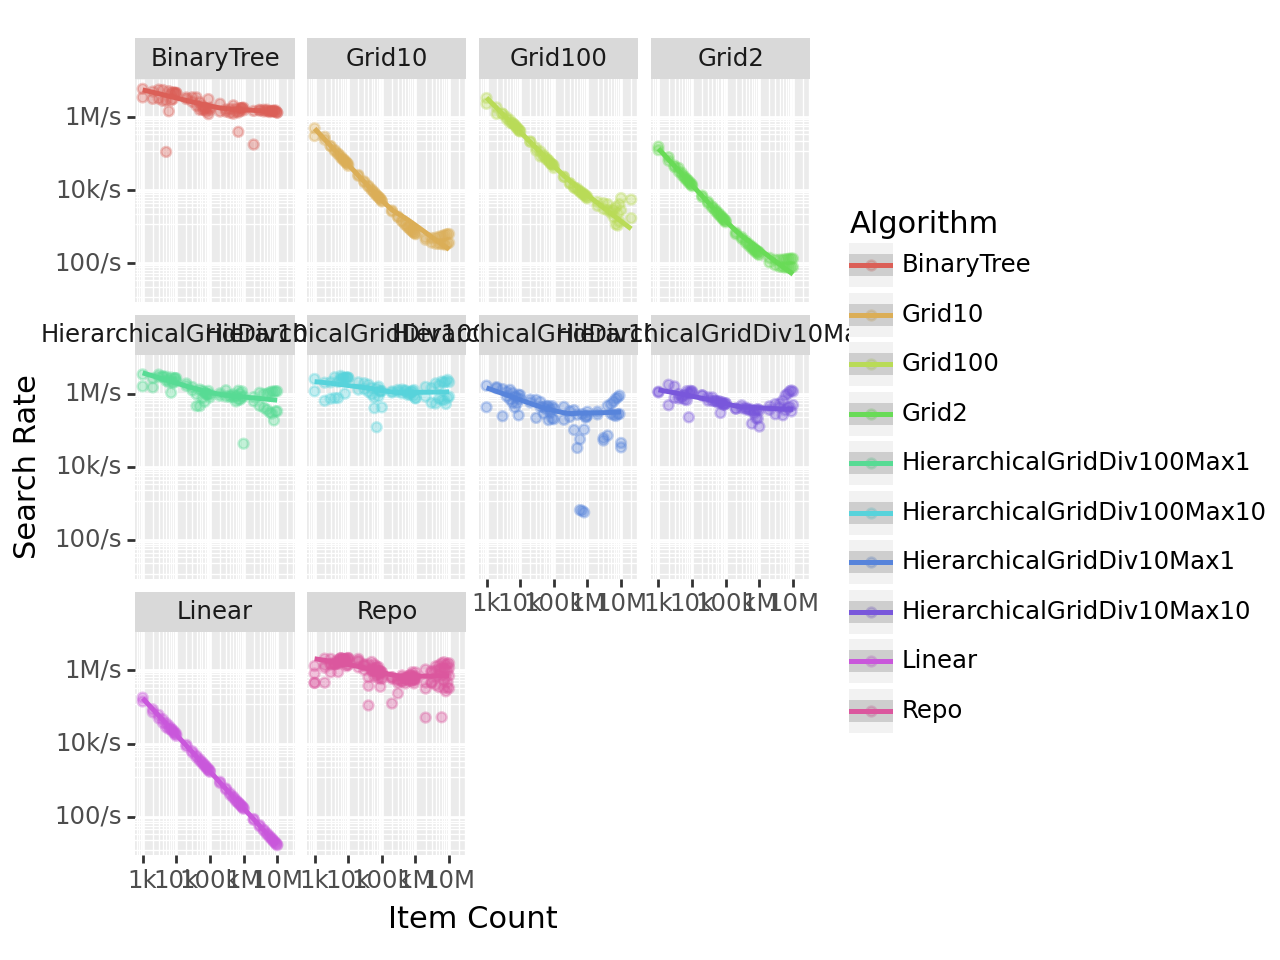

<Figure Size: (640 x 480)>

In [10]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Item Count", y="Search Rate", color="Algorithm"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 #+ scale_color_discrete(l=.4)
 + geom_smooth()
 + labs(x='Item Count', y='Search Rate')
 + facet_wrap("Algorithm", scales="fixed")
 )